### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla\cdot \boldsymbol{D}  = {0}$

 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \biggl(\mathbb{C}_{mod} \boldsymbol{\epsilon} -\mathbb{e}_{mod}^T\boldsymbol{E}\biggr) $

$\boldsymbol{D} = \biggr({\boldsymbol{K}_{mod}\boldsymbol{E}} +  \mathbb{e}_{mod}\boldsymbol{\epsilon}\biggl) $

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon} + \boldsymbol{E} \cdot \boldsymbol{K}\boldsymbol{E} + \boldsymbol{\epsilon}:\mathbb{e}^T\boldsymbol{E}\biggr)$

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

$\mathbb{e}_{mod} = s^2 \mathbb{e}$

$\boldsymbol{K}_{mod} = s^2 \boldsymbol{K}$

 # Weak Form

### For Piezo-elasticity part

 $a((\boldsymbol{u},\phi), ({\boldsymbol{v}},{\psi})) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega - \int_\Omega \bigl ( \boldsymbol{e}_{mod}^T\boldsymbol{E}:\nabla \boldsymbol{v}\bigr)d\Omega + \int_{\Omega}\left(\boldsymbol{K}_{mod}\boldsymbol{E} \cdot \nabla \boldsymbol{\psi}\right) + \int_{\Omega}\left(\mathbb{e}_{mod}\boldsymbol{\epsilon}  \cdot \nabla  \boldsymbol{\psi}\right)d\Omega$

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.TensorValues
using Plots

In [2]:
using SymPy

x,x₁ = symbols("x,x₁", real = true)

heaviside(x) = 0.5 * (sign(x) + 1)
interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

interval (generic function with 1 method)

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [3]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [4]:
const L = 1e-3
const H = 1e-3
const lsp = L/90
const CP = H/2
const CL = 0.5*L 
const CH = H/2000
const hfc = lsp/5
const hf = lsp/4
const h = 20*hf 
const FMR = 6*lsp
 
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 1)  
gmsh.model.geo.addPoint(L, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, H, 0.0, h, 3) 
gmsh.model.geo.addPoint(0.0, H, 0.0, h, 4)
gmsh.model.geo.addPoint(0.0, CP + CH, 0.0, h, 5)
gmsh.model.geo.addPoint(CL, CP + CH, 0.0, hfc, 6)
gmsh.model.geo.addPoint(CL, CP - CH, 0.0, hfc, 7)
gmsh.model.geo.addPoint(0.0, CP - CH, 0.0, h, 8)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 1, 8)
gmsh.model.geo.addCurveLoop([1,2,3,4,5,6,7,8],1) 
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.addPhysicalGroup(2, [1],1)
gmsh.model.addPhysicalGroup(1, [1],1)
gmsh.model.addPhysicalGroup(1, [3],2)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "BottomEdge")
gmsh.model.setPhysicalName(1, 2, "TopEdge")


gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", 0.8*CL)
gmsh.model.mesh.field.setNumber(11, "XMax", L)
gmsh.model.mesh.field.setNumber(11, "YMin", CP-FMR)
gmsh.model.mesh.field.setNumber(11, "YMax", CP+FMR)
gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("SquarePlateWithEdgeNotch.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00357306s, CPU 0.00358s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.347131s, CPU 0.34326s)
Info    : 11526 nodes 23058 elements
Info    : Writing 'SquarePlateWithEdgeNotch.msh'...
Info    : Done writing 'SquarePlateWithEdgeNotch.msh'


In [5]:
model = GmshDiscreteModel("SquarePlateWithEdgeNotch.msh")
writevtk(model,"SquarePlateWithEdgeNotch")

Info    : Reading 'SquarePlateWithEdgeNotch.msh'...
Info    : 17 entities
Info    : 11526 nodes
Info    : 22859 elements
Info    : Done reading 'SquarePlateWithEdgeNotch.msh'


3-element Vector{Vector{String}}:
 ["SquarePlateWithEdgeNotch_0.vtu"]
 ["SquarePlateWithEdgeNotch_1.vtu"]
 ["SquarePlateWithEdgeNotch_2.vtu"]

In [6]:
cd("ResultNotchedPlateElecField_50")

In [7]:
const T0 = 300
const TAppMax = T0+50

#const ElecF = 0
const phiMaxApp = 1000.0
const phiMin = 0.0

const delt = 1e-2
const tMax = 1
const uMax = 3.5e-6
const AppVel = uMax/tMax
const uMin = 0

uTran_Temp = 0.2*uMax
uTran2_EP = 0.05*uMax

1.7500000000000002e-7

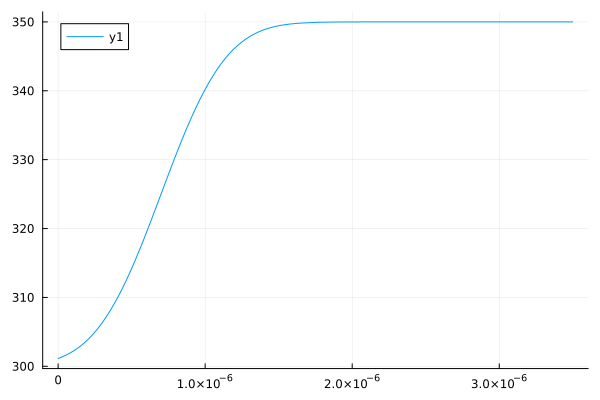

In [8]:
hS = uMax/10
F_Temp(x) = (T0 - TAppMax) * interval(x,-4*hS+uMin,uTran_Temp)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS))*exp(-(x-x₁)^2/(2*hS^2))
smoothT = SymPy.integrate(F_Temp(x₁)*wₕ(x,x₁),(x₁,-4*hS,uMax)) +  TAppMax
plot(smoothT,0,uMax)

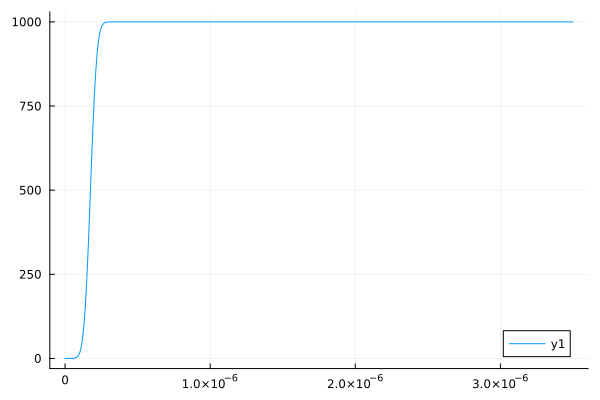

In [9]:
hS_pf = uMax/100
F_ϕ(x) = (phiMin - phiMaxApp) * interval(x,-4*hS_pf+uMin,uTran2_EP)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS_pf))*exp(-(x-x₁)^2/(2*hS_pf^2))
smoothϕ = SymPy.integrate(F_ϕ(x₁)*wₕ(x,x₁),(x₁,-4*hS_pf,uMax)) +  phiMaxApp
plot(smoothϕ,0,uMax)

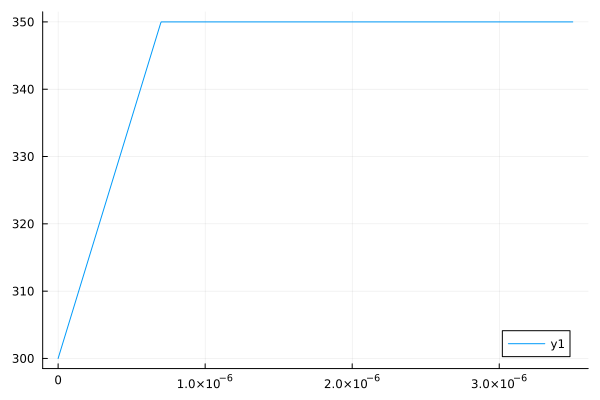

In [10]:
function Tfun(u)  
    if u <= uTran_Temp
      return ((TAppMax - T0)/uTran_Temp)*u + T0
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

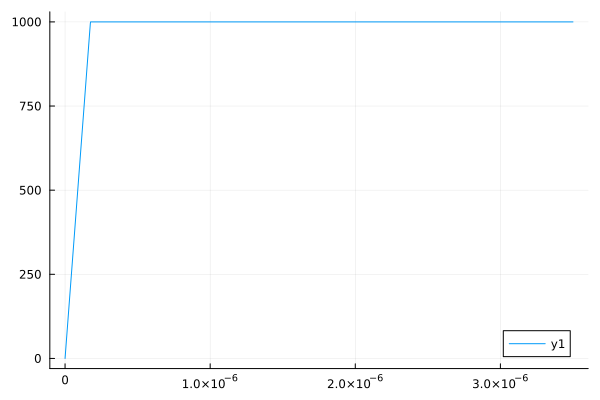

In [11]:
function ϕ_fun(ϕ)  
    if ϕ <= uTran2_EP
      return ((phiMaxApp - phiMin)/uTran2_EP)*ϕ + phiMin
    else
     return  phiMaxApp
    end
end 
plot(ϕ_fun,0,uMax)

In [12]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

AppTOption = 1 ## 1 for smooth and otherwise linear than constant

if AppTOption == 1
    TAppVec = smoothT.(uAppVec)
  else
    TAppVec = Tfun.(uAppVec) 
end 

AppϕOption = 2 ## 1 for smooth and otherwise linear than constant

if AppϕOption == 1
    ϕAppVec = smoothϕ.(uAppVec)
  else
    ϕAppVec = ϕ_fun.(uAppVec) 
end 

100-element Vector{Float64}:
    0.0
  202.02020202020202
  404.04040404040404
  606.0606060606061
  808.0808080808081
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
    ⋮
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0
 1000.0

In [13]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

22823-element Vector{Int8}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

In [14]:
const Mat_tag = get_tag_from_name(labels,"Domain")

3

## Input paramters for Piezo-Electric Material Properties

#### Input elasticity parameters

In [15]:
const c = 421.4
const ρ = 5700.0

5700.0

#### Input fracture parameters

In [16]:
const Gc = 200
const η = 1e-8

1.0e-8

## COnstitutive Matrices

### Elastic stiffness tensor

In [17]:
const C₁₁_mat = 166e9
const C₁₂_mat = 78e9
const C₂₂_mat = 162e9
const C₆₆_mat = 43e9

4.3e10

In [18]:
function ElasFourthOrderConstTensor(C₁₁,C₁₂,C₂₂,C₆₆)
      C1111 = C₁₁
      C1122 = C₁₂
      C1112 = 0.0
      C2222 = C₂₂
      C2212 = 0.0
      C1212 = C₆₆    
      C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end
const C_mat = ElasFourthOrderConstTensor(C₁₁_mat,C₁₂_mat,C₂₂_mat,C₆₆_mat)

SymFourthOrderTensorValue{2, Float64, 9}(1.66e11, 0.0, 7.8e10, 0.0, 4.3e10, 0.0, 7.8e10, 0.0, 1.62e11)

### Third order piezoelectric tensor

In [19]:
const e₂₁_mat = -4.4
const e₂₂_mat = 18.6
const e₁₆_mat = 11.6

11.6

In [20]:
function PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆)
    # 1 for Plane Stress and 2 Plane Strain Condition 
      e111 = 0.0
      e112 = e₁₆
      e121 = e₁₆
      e122 = 0.0
      e211 = e₂₁
      e212 = 0.0
      e221 = 0.0
      e222 = e₂₂   
    vals = zeros(2,2,2);
    vals[1,:,:] .= [e111 e112
                    e121 e122]
    vals[2,:,:] .= [e211 e212
                    e221 e222]
    e_ten = ThirdOrderTensorValue(vals ...)
    return  e_ten
end

const e_mat = PiezoThirdOrderConstTensor(e₂₁_mat,e₂₂_mat,e₁₆_mat)

ThirdOrderTensorValue{2, 2, 2, Float64, 8}(0.0, -4.4, 11.6, 0.0, 11.6, 0.0, 0.0, 18.6)

### Second order electrical permittivity tensor

In [21]:
const K₁₁_mat = 11.2e-9
const K₂₂_mat = 12.6e-9

1.26e-8

In [22]:
const K_mat = TensorValue(K₁₁_mat,0.0,0.0, K₂₂_mat)

TensorValue{2, 2, Float64, 4}(1.12e-8, 0.0, 0.0, 1.26e-8)

### Thermal Coefficient

In [23]:
const α₁₁_mat = 15.7e-6
const α₂₂_mat = 6.4e-6

6.4e-6

In [24]:
const α_mat = TensorValue(α₁₁_mat,0.0,0.0, α₂₂_mat)

TensorValue{2, 2, Float64, 4}(1.57e-5, 0.0, 0.0, 6.4e-6)

In [25]:
κ_mat = 3.2
κGradTemp(∇,s_in) = (s_in^2 + η)*κ_mat*∇

κGradTemp (generic function with 1 method)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

In [26]:
σ_elas(ε) = C_mat ⊙ ε

function σ_elasMod(ε, T, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εElas = ε - α_mat*(T-T0)
    if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
    else
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas)
    end  
    return σ
end

function σ_TotMod1(ε, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εTot = ε
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εTot)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εTot) + I4_vol⊙ σ_elas(εTot)
  end  
    return σ
end

function σ_TotMod2(T, ε_in, s_in, T_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    εElas = - α_mat*T
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas) + I4_vol ⊙ σ_elas(εElas)
  end  
    return σ
end

function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α_mat*(T_in-T0)
   εElasTher = α_mat*(T0)
    if tr(εElas_in)  >= 0
        σF = (s_in^2 + η)*σ_elas(εElasTher)
    elseif tr(εElas_in) < 0
        σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol ⊙ σ_elas(εElasTher)
    end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [27]:
σ_piezo(∇) = ∇ ⋅ e_mat

σ_piezoMod(∇, s_in) = (s_in^2 + η)*σ_piezo(∇)

σ_piezoMod (generic function with 1 method)

### Electric Displacement

$\boldsymbol{D}_{elas}(ε(\boldsymbol{u}),tag) = \mathbb{e}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{elasMod}(ε(\boldsymbol{u}),s,tag) = \mathbb{e}_{mod}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\boldsymbol{E}(\phi)) = -\boldsymbol{K}\boldsymbol{E} $

or, $\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

$\boldsymbol{D}_{piezoMod}(\nabla\phi,s)  = \boldsymbol{K}_{mod}\boldsymbol{\nabla} \phi$

In [28]:
function D_elasMod1(ε, s_in)
    εElas = ε
    return (s_in^2 + η)*(e_mat ⋅² εElas)
end

function D_elasMod2(T, s_in)
    εElas = - α_mat*T
    return (s_in^2 + η)*(e_mat ⋅² εElas)
end

function D_ThermMod(s_in)
    εElas = α_mat*T0
    return (s_in^2 + η)*(e_mat ⋅² εElas)
end

D_ThermMod (generic function with 1 method)

In [29]:
D_piezo(∇) = K_mat ⋅ ∇

function D_piezoMod(∇, s_in)   
    return (s_in^2 + η)*D_piezo(∇)
end

D_piezoMod (generic function with 1 method)

In [30]:
function ψPos(ε_in, T_in, ∇_in)
    εElas_in = ε_in - α_mat*(T_in-T0)
    if tr(εElas_in) >= 0
        ψPlus = 0.5*(εElas_in ⊙ σ_elas(εElas_in)) + 0.5*(σ_piezo(∇_in) ⊙ εElas_in)
    elseif tr(εElas_in) < 0
        ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ εElas_in)) + 0.5*(σ_piezo(∇_in) ⊙ (I4_dev ⊙ εElas_in))
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [31]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [32]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [33]:
order = 1
degree = 2*order

2

In [34]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [35]:
LoadTagId = get_tag_from_name(labels,"TopEdge")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 18
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 3086759015261429577

In [36]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 22823
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 790106954476898903

In [37]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["TopEdge","BottomEdge"],
          dirichlet_masks=[(false,true), (true,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 22823
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 790106954476898903

In [38]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["TopEdge","BottomEdge"])
ϕh = zero(V0_ElecPot)

SingleFieldFEFunction():
 num_cells: 22823
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 790106954476898903

In [39]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = FESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["TopEdge","BottomEdge"])
Th = zero(V0_Temp)

SingleFieldFEFunction():
 num_cells: 22823
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 790106954476898903

In [40]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot,V0_Temp])

MultiFieldFESpace()

In [41]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [42]:
 function   stepDispElecPotTemp(uh_in,phih_in,Th_in,sh_in,vApp,phiApp,TApp,delt)
    
        uApp1(x) = VectorValue(0.0,vApp)
        uApp2(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
    
        phiApp1(x) = phiApp
        phiApp2(x) = 0
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2])
    
        Tapp1(x) = TApp
        Tapp2(x) = T0
        U_Temp = TrialFESpace(V0_Temp,[Tapp1,Tapp2])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot,U_Temp])
    
        a((u,ϕ,T),(v,φ,ϑ)) = ∫( ((ε(v)) ⊙ (σ_TotMod1∘(ε(u), ε(uh_in), sh_in, Th_in))) 
                              + ((ε(v)) ⊙ (σ_TotMod2∘(T, ε(uh_in), sh_in, Th_in)))
                              + ((ε(v)) ⊙ (σ_piezoMod∘(∇(ϕ), sh_in)))
                              - ((∇(φ))⋅(D_piezoMod∘(∇(ϕ), sh_in))) 
                              + ((∇(φ))⋅(D_elasMod1∘(ε(u), sh_in)))
                              + ((∇(φ))⋅(D_elasMod2∘(T, sh_in)))
                              + ((∇(ϑ))⋅(κGradTemp∘(∇(T),sh_in))) 
                              + (ϑ*((ρ*c*T)/delt)) )*dΩ
        b((v,φ,ϑ)) = ∫( -(ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,Th_in)))
                      - (∇(φ)⋅(D_ThermMod∘(sh_in))) 
                      + (ϑ*((ρ*c*Th_in)/delt)) )*dΩ
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = Gridap.solve(op)
        uh_out,phih_out,Th_out = uhPhi
    
    return uh_out,phih_out,Th_out
end

stepDispElecPotTemp (generic function with 1 method)

In [43]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)


ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)


while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]
    phiApp = ϕAppVec[count]
    
    
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,ϕh,Th = stepDispElecPotTemp(uh,ϕh,Th,sh,vApp,phiApp,TApp,delt)
        
        ψhPos_in = ψPos∘(ε(uh),Th,∇(ϕh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),Th,ε(uh),sh,Th)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_piezoMod∘(∇(ϕh),sh) ) )  *dΓ_Load)
    
    push!(Load, Node_Force[2])
    push!(Displacement, vApp)
    if mod(count,2) == 0
         writevtk(Ω,"results_NotchedPlate_0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh),"T" => Th])
    end
end


 Entering displacemtent step1 :3.5e-8
 Relative error = 4.30349799287982e-17
 Entering displacemtent step2 :7.0e-8
 Relative error = 4.83928798568681e-6
 Relative error = 2.366338816164882e-5
 Relative error = 4.373875883817915e-9
 Entering displacemtent step3 :1.05e-7
 Relative error = 2.7537714790631394e-9
 Entering displacemtent step4 :1.4e-7
 Relative error = 4.175912947289945e-5
 Relative error = 6.102692354151731e-5
 Relative error = 7.527962101636535e-9
 Entering displacemtent step5 :1.7500000000000002e-7
 Relative error = 7.0251583029057565e-9
 Entering displacemtent step6 :2.1e-7
 Relative error = 7.807584304578521e-5
 Relative error = 9.639727381832402e-5
 Relative error = 1.606912661068346e-8
 Relative error = 1.4137233805722493e-8
 Relative error = 1.4632061570860093e-8
 Relative error = 1.4874385628645945e-8
 Relative error = 1.4648925508061678e-8
 Relative error = 1.3736739109087033e-8
 Relative error = 1.2701427423482122e-8
 Relative error = 1.171319710274863e-8
 Enteri

 Relative error = 4.494851380751067e-9
 Entering displacemtent step49 :1.715000000000001e-6
 Relative error = 0.0004226633394513813
 Relative error = 0.0004471298192905155
 Relative error = 9.380267636828159e-6
 Relative error = 2.3362598572131566e-6
 Relative error = 8.055649560592093e-7
 Relative error = 2.8383009198548316e-7
 Relative error = 9.567880789874964e-8
 Relative error = 2.898521592431222e-8
 Relative error = 7.106540637945819e-9
 Entering displacemtent step50 :1.7500000000000008e-6
 Relative error = 2.641456376320515e-9
 Entering displacemtent step51 :1.7850000000000007e-6
 Relative error = 0.0004396188083143461
 Relative error = 0.0004652657125918394
 Relative error = 1.1237983656782391e-5
 Relative error = 3.254957520311881e-6
 Relative error = 1.3080088147214408e-6
 Relative error = 5.511033313312831e-7
 Relative error = 2.3006192727676305e-7
 Relative error = 9.293486508136975e-8
 Relative error = 3.5428353028383903e-8
 Relative error = 1.2265626486226467e-8
 Entering

In [44]:
 writevtk(Ω,"results_NotchedPlate_0_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])

(["results_NotchedPlate_0_100.vtu"],)

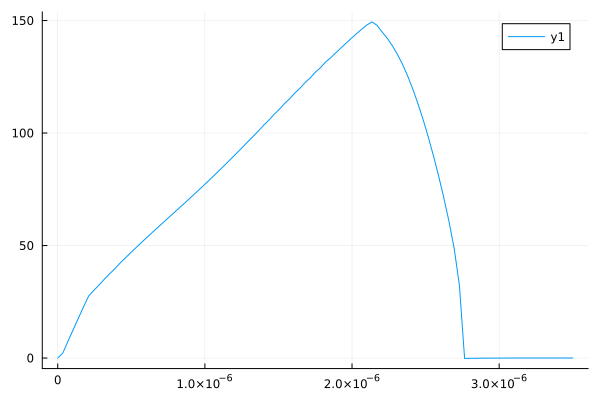

In [45]:
plot(Displacement,(Load)*1e-3)

In [46]:
maximum(Load)

149391.99416844873

In [47]:
cd("../DataLoadDispResultNotchedPlate")

In [48]:
using DelimitedFiles
Disp = writedlm("DispDataResult0mmEccentricNotchedBeam_50_1000V.csv",  Displacement, ',')
Force = writedlm("LoadDataResult0mmEccentricNotchedBeam_50_1000V.csv",  Load, ',')